In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()

In [49]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [50]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [76]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [59]:
import datetime as dt

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
latest_date = dt.date.fromisoformat(most_recent_date[0])
# Calculate the date one year from the last date in data set.
one_year = latest_date - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [133]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, func.max(Measurement.prcp)).filter(Measurement.date >= one_year).group_by(Measurement.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('Date').set_index('Date')
prcp_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


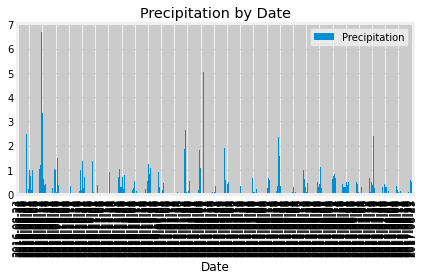

In [139]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar(title='Precipitation by Date')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [127]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [146]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Station.station)).first()
station_count[0]

9

In [155]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [159]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
print(most_active_station)

station_summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).first()
print(station_summary)

USC00519281
(54.0, 85.0, 71.66378066378067)


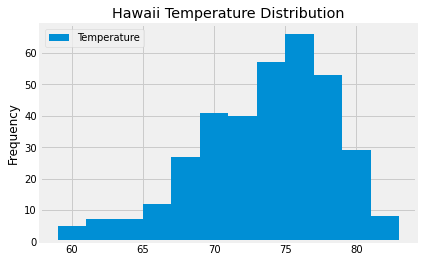

In [163]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_station = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year).all()
station_df = pd.DataFrame(last_year_station, columns=['Date', 'Temperature']).set_index('Date')
station_df.plot.hist(title='Hawaii Temperature Distribution', bins=12)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()